In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker, cm, colors
from matplotlib.colors import LogNorm
import seaborn as sns
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import ode
import scipy.ndimage
import glob
import os
from fractions import Fraction
import csv
import itertools
import math
from scipy import stats

In [2]:
# colormapをカスタマイズする
from matplotlib.colors import LinearSegmentedColormap

def generate_cmap(colors):
    """自分で定義したカラーマップを返す"""
    values = range(len(colors))

    vmax = np.ceil(np.max(values))
    color_list = []
    for v, c in zip(values, colors):
        color_list.append( ( v/ vmax, c) )
    return LinearSegmentedColormap.from_list('custom_cmap', color_list)

#plotの文字定義
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams["mathtext.fontset"] = 'stix'



In [57]:
dt = 0.02
t_end=1
len_t = int(t_end/dt)
len_tt = int(t_end/dt)
# print (len_t)
p = 1
# h=2
# a=2
u=0.0001
# k=1
b = 4

# ts = 1/(b*h)
# tamesi = ts - (-p+ts*(u+h))*dt
# tamesi2 = tamesi*h*b
# tamesi3 = np.sqrt(tamesi*h*b)
# print(b, ts, tamesi, tamesi2, tamesi3)

# print(ts)

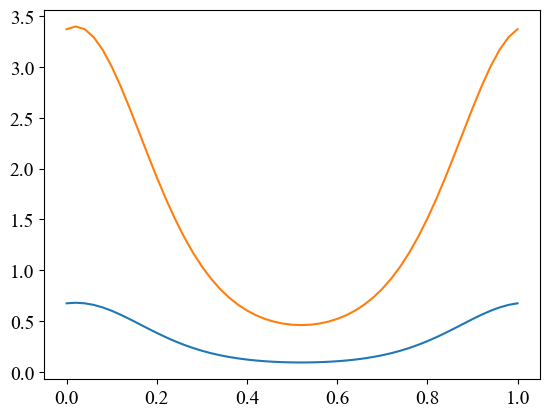

In [58]:
h0_list = []
cri1_list = []
cri2_list = []
t3_list=[]
t4_list=[]

# h0 = 0
smax = 1
a1 = 0
b1 = 1

for i in range(len_t):
    
    t = t_end - dt*(i+1)
    h = math.exp(a1 + b1*np.cos(2*math.pi*(0.5+t/t_end)))

    # h0 += h*dt

    t3_list.append(t)
    h0_list.append(h)

# plt.plot(t3_list, h0_list)

for j in range(len_t+1):
    t = dt*j
    t4_list.append(t)

    h = h0_list[-j]
    # print(h)
    cri1 = 1/(h*b)
    cri2 = (1+b*smax)/(h*b)
    cri1_list.append(cri1)
    cri2_list.append(cri2)

plt.plot(t4_list, cri1_list)
plt.plot(t4_list, cri2_list)



In [59]:

#Pontryagin
#initial value
l = 1
v = 1
s = 0

lam = 0

#list
s_list =[s]
lam_list = [lam]
t_list = [t_end]

tt_list = [0]
l_list = [l]
v_list = [v]

for i in range(len_t):
    
    t = t_end - dt*(i+1)
    t_list.append(t)
    s = s_list[-1]
    lam = lam_list[-1]
    h = h0_list[i]
    
    cri = 1/(h*b)
    lam1 = lam + (p-s-lam*(u + h/(1 + b*s)))*dt

    if lam1<=cri:
        s1 = 0
    elif (cri < lam1) or (lam1 < (1+b*smax)*cri):
        s1 = (np.sqrt(lam1*b*h)-1)/b
    # else:
    #     s1 = smax
    
    s_list.append(s1)
    lam_list.append(lam1)

# for i in range(len_t):

#     t = dt*(i + 1)
#     tt_list.append(t)
#     h = h2_list[i]

#     l1 = l_list[-1] - (u + h / (1 + b*s_list[-i]))*l_list[-1]*dt
#     # v1 = v_list[-1] + (s_list[-i+1]-k*l_list[-1])*dt

#     l_list.append(l1)
    # v_list.append(v1)
    
# print(lam_list)
# print(s_list)

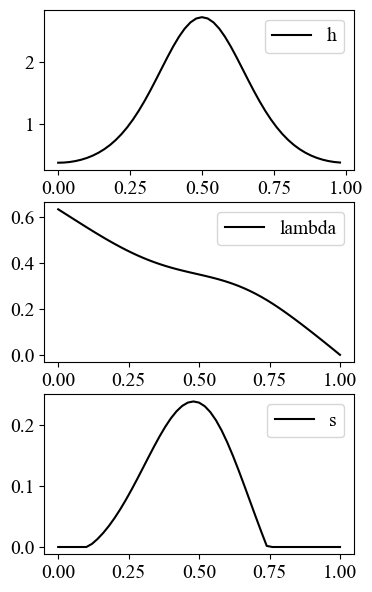

In [60]:
fig = plt.figure(figsize=(4, 1.414*5))

ax1 = fig.add_subplot(3, 1, 1)   #1行4列の１番目
ax1.plot(t3_list, h0_list, color = "black", label="h")
#ax1.set_ylim([0,1])
ax1.legend()

ax2 = fig.add_subplot(3, 1, 2)   #１行4列の２番目
ax2.plot(t_list, lam_list, color = "black", label="lambda")
#ax2.set_ylim([0,1])
ax2.legend()

ax3 = fig.add_subplot(3, 1, 3)   #1行4列の3番目
ax3.plot(t_list, s_list, color = "black", label="s")
# ax3.set_ylim([0,1])
ax3.legend()

# ax4 = fig.add_subplot(1, 4, 4)   #１行4列の4番目
# ax4.plot(tt_list, l_list, color = "black", label="L")
# ax4.set_ylim([0,1])
# ax4.legend()

plt.savefig("fig4.png")